# Team Assignment 5 - Bayes Theorom 

**Team Trackstars** (Stuart B & Jason M) 

This notebook provides an introduction to Bayes theorem and an accompanying code demonstration to reinforce the critical concepts. 

In [167]:
from IPython.display import display, HTML

def comment(message, color='lightblue'): 
    """
    Utility function to ensure a message stands out. 
    """
    # HTML rendering with help from https://stackoverflow.com/questions/68347513/jupyter-and-python-passing-css-colors-to-a-div-tag-from-a-dictionary
    display(HTML(f"<div style='background-color:{color}'>" + message + "</div>"))

In [168]:
import matplotlib.pyplot as plt
import datetime

In [169]:
import pandas as pd 

## Frequentist vs Bayesian Statistics

It might be interesting to talk for a second about frequentist vs bayesian approaches to probability estimation. 
 - Bayes theorem is often illustrated with an example where our belief about rain is adjusted based on the fact it's cloudy. This example is sort of unhelpful as we usually have so much in the way of historicals, that we can go the *frequentist* approach and just directly estimate the probability of rain based our long history of observations. Using a bayesian update technique in this case seems impractical, and indeed throws out a lot of data that you could use.
 - However, many situations do not have rich historicals to draw estimates from, or might be deviate wildly from the historicals, and either of these cases would be inferior to a bayesian approach that is really at its heart about trying to perpetually contextualize new observations 

## Frequentist Approach to Modeling Major Flood Events in Asheville

In [170]:
!ls

README.md            avl_rainfall.csv     ta5-trackstars.ipynb
avl_crests.csv       requirements.txt


In [171]:
df = pd.read_csv('avl_rainfall.csv') 

In [172]:
df = df[df['YEAR']>1887]

In [173]:
df.head(1) 

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
17,1888,0.94,1.75,0.00,0.02,6.47,1.49,4.40,2.42,10.94,3.57,3.75,2.74,38.49


In [174]:
months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'] 

In [175]:
for month in months: 
    df[month] = pd.to_numeric(df[month])

In [176]:
df2 = pd.read_csv('avl_crests.csv') 

In [177]:
flood_categories = {
    'major' : 18, 
    'moderate' : 13, 
    'minor' : 9.5, 
    'action' : 6.5
}

In [178]:
def categorize_crests(level): 
    """
    Assign flood categories based on water level
    """
    for category, height in flood_categories.items(): 
        if level >= height: 
            return category

df2['Category'] = df2['Level'].apply(categorize_crests)

In [179]:
df2_major = df2[df2['Category'] == 'major']
df2_moderate = df2[df2['Category'] == 'moderate']
df2_minor = df2[df2['Category'] == 'minor']

In [180]:
decades = range(1888, 2024, 5) 

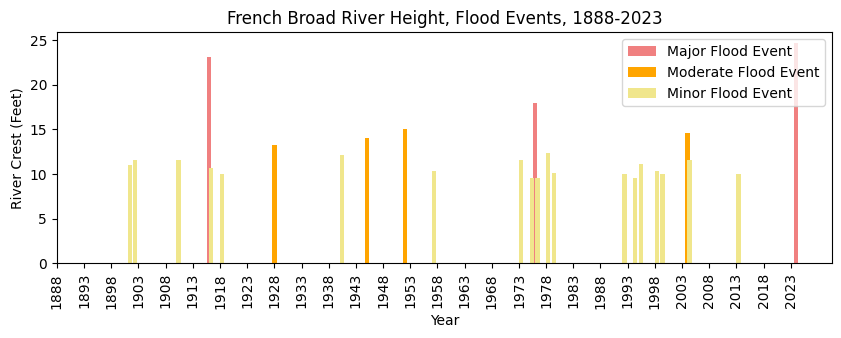

In [181]:
plt.figure(figsize=[10,3])
#plt.bar(df['YEAR'], df['ANN']) 
plt.bar(df2_major['Year'], df2_major['Level'],label='Major Flood Event', align='center', color='lightcoral')
plt.bar(df2_moderate['Year'], df2_moderate['Level'], label='Moderate Flood Event', color='orange')
plt.bar(df2_minor['Year'], df2_minor['Level'], label='Minor Flood Event', align='edge', color='khaki')
plt.xlabel("Year") 
plt.xticks(decades, rotation=90)
plt.ylabel("River Crest (Feet)")
plt.title("French Broad River Height, Flood Events, 1888-2023") 
_ = plt.legend()


Probability of a major flood event (shown in red) is 

$p_{flood} = {\dfrac{events}{years}}$

$p_{flood} = {\dfrac{2}{2024-1888}}$

$p_{flood} \approx{0.014}$

In [182]:
p_maj_flood = 2/(2024 - 1888)
p_mod_flood = 6/(2025-1888) 
p_flood = p_maj_flood + p_mod_flood 

comment(f"The probability of a major flood event in Asheville, NC based on historical events, prior to 2024 is ~= <b>{p_maj_flood:.2}</b>")
comment(f"The probability of a moderate flood event in Asheville, NC based on historical events, prior to 2024 is ~= <b>{p_mod_flood:.2}</b>")

### Challenge - Limited data

Note while 100+ years of measurements seems thorough, it's not even a remotely representative sample of what's happened with the weather since the last ice age. See the plot below for visual evidence of this. 

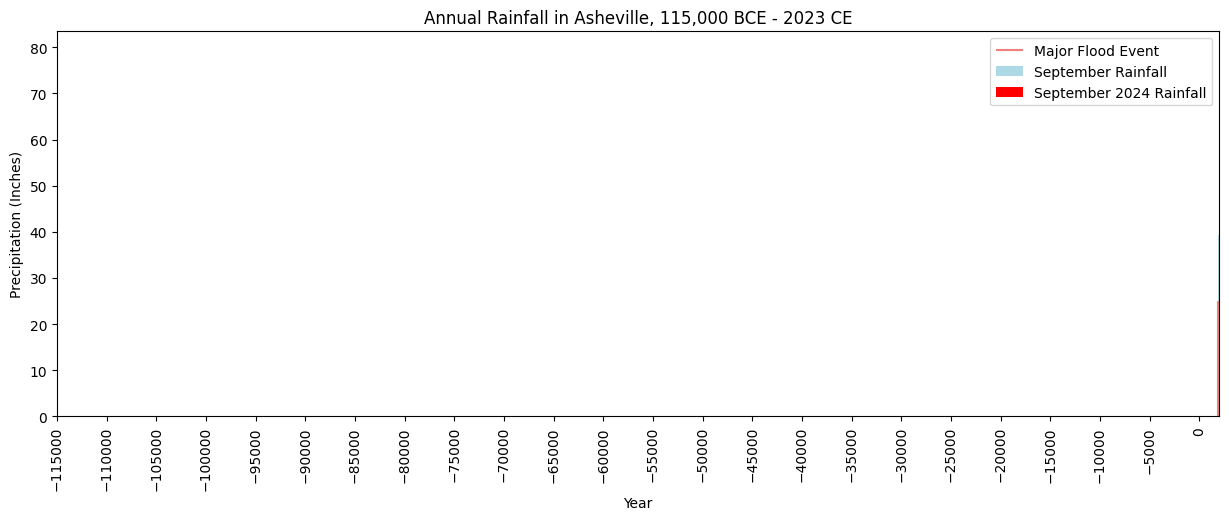

In [183]:
millenia = range(-115000, 2024, 5000) 
plt.figure(figsize=[15,5])
#plt.bar(df['YEAR'], df['ANN']) 
plt.vlines(df2_major['Year'], ymin=0, ymax=25,label='Major Flood Event',color='lightcoral')
plt.bar(df['YEAR'], df['ANN'], label='September Rainfall', color='lightblue') 
#plt.plot(df['YEAR'], df['ANN']/12, color='orange', label='Average Monthly Rainfall')
plt.bar([2024], df.iloc[-1]['SEP'], label='September 2024 Rainfall', color='red') 
plt.xticks(millenia, rotation=90)
plt.xlabel("Year") 
plt.ylabel("Precipitation (Inches)")
plt.title("Annual Rainfall in Asheville, 115,000 BCE - 2023 CE")
_ = plt.legend()

### Challenge - Anomalous events and changes to the model 

We also have the problem with the frequentist approach of tracking changes with the underlying phenomenon. Here we see the flood event of 2024, which is ceertainly an outlier. Do we have other options for adapting to these types of changes?

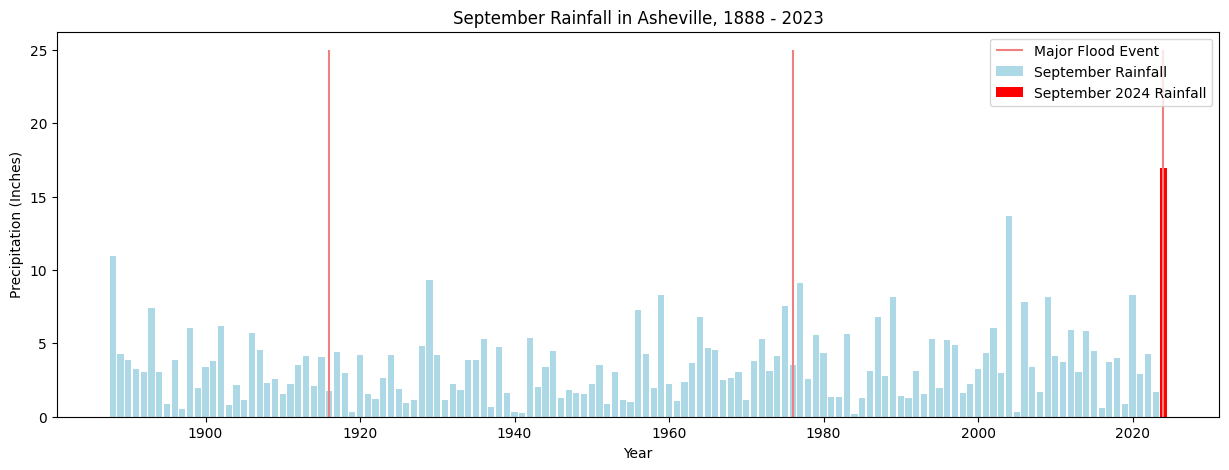

In [184]:
plt.figure(figsize=[15,5])
#plt.bar(df['YEAR'], df['ANN']) 
plt.vlines(df2_major['Year'], ymin=0, ymax=25,label='Major Flood Event',color='lightcoral')
plt.bar(df['YEAR'], df['SEP'], label='September Rainfall', color='lightblue') 
#plt.plot(df['YEAR'], df['ANN']/12, color='orange', label='Average Monthly Rainfall')
plt.bar([2024], df.iloc[-1]['SEP'], label='September 2024 Rainfall', color='red') 
plt.xlabel("Year") 
plt.ylabel("Precipitation (Inches)")
plt.title("September Rainfall in Asheville, 1888 - 2023")
_ = plt.legend()

## Bayesian Approach

The degree to which a hypothesis H is likely to occur in the presence of evidence E can be related as a probability. We write this probability as $P(H|E)$, and we call this term the *likelihood*. The term yields the probability that H is true in the context of E. The *likelihood* of H given E.

In it's basic form, Bayes theorem gives us a way to compute that likelihood: 

$$ P(H|E) = \dfrac{P(E|H)P(H)}{P(E)}$$

Here we also need information about our base or **prior** belief about H, $P(H)$ and the likelihood that the evidence we're considering has demonstrated some influence on H, $P(E|H)$. 

These three values yeild the estimate we're after, our **posterior** belief that H is likely given E. 

### Bayes Factor

We can and should talk about another way to think about what this theorem is doing. The likelihood of the evidence in the context of the hypothesis, normalizewd by the probability of the evidence is called the **Bayes Factor**. 

$$ P(H|E) = {Bayes factor}\cdot{P(H)}$$

$$ P(H|E) = \dfrac{P(E|H)}{P(E)}\cdot{P(H)}$$

The Bayes Factor scales the likelihood of the **prior** belief. Essentially we incorporate the new information *to the degree it has bearing on the hypothesis we care about*. Where the new information supports our old information, we want to increase the likelihood estimate. Where the new information rejects our old information, we want to erode the likelihood estimate.  

Said another way, if the evidence is more likely to occur than the base rate, in the context of the hypothesis, it should strengthen the hypothesis. If the evidence is less likely to occur than the base rate, in the context of the hypothesis, it should weaken H. 

Bayes factor is the ratio of the likelihood of the conditioned event to the unconditioned global probabiltiy.

Why not just replace your prior with the new evidence and dispense with the probability fusion. Because the prior existed based on prior evidence. If every day you woke up and saw it was sunny, and concluded there was a 100% chance the next day would be sunny, and every day you wokr up to rain presumed rain was coming tomorrow, you'd be a perpetually unprepared individual. Yes it's true that the world is more complicated than a pair of probabilities, and the degree to which we trust our historical observations in the context of new evidence is something we are free to adjust. How? 
- You can take measurements with a higher frequency 

Law of total probability: 

$$ P(B) = P(B|A) P(A) + P(B|\neg{A}) P(\neg{A}) $$

Bayes factor - how strong is the evidence here? does it reinforce A or undermine it? This ratio scales the prior up or down based on how much it agrees vs disagrees.

❗️ explain how we model real systems here - what allows us to be more intelligent about how probabilities are fused? 
- all of the terms in the equation can be tuned for real world applications. if you are predicting stock prices and you see there was a massive selloff in tokyo this morning, you could hack the prior evidence ... but bayesian filters are essentially just recursive applications of the bayes equation, where the prior *IS* the previous steps posterior. this really only leaves us with one knob to turn, and that is how new evidence is treated and how much weight it's given at each step (jointly, the bayes factor). so if you had information that a hurricane would upend your prior evidence, you might elect to bias your predictions heavily to new information (that is give more credence to new information - boosting the pro

But what about time steps and measurements? We could just keep running this update step, putting a relentless and artificial pressure on the likelihood.  This is called *prior dilution* and for real problems, you'd have to adopt strategies to prevent this from occurring. Essentially, you need to tune the hyperparameters to your application. 

❗️ TODO : explain how to counter the above problem (of hacking the frequency of update)

### Likelihood of a flood following two months of above-average rainfall 

We know the proximate cause of a flood event is rain. But let's say we suspect an underappreciated factor of the flooding is that the soil was saturated at the time the rain arrived. That is, the ground had no further capacity to absorb water and thus contributed to the likelihood heavy rain pools to crreate flood conditions. 

**Question**: What is the chance of having a flood event if we have above average rain event the months preceding the flood?

- We have computed an estimate for the probability of a flood based on historical measurements, $P(flood)$
- We can compute the probability of above average rain events, $P(rain_{abnormal})$
- We need to know in historical flood conditions, what is the probability that we had above average rain in the months prior? $P(rain_{abnormal}|flood)$

The answer to our question is as follows. 

$$P(flood|rain_{abnormal}) = \dfrac{P(rain_{abnormal}|flood) P(flood)}{P(rain_{abnormal})}$$

### 1 - Probability of a flood

We computed this above from historicals. 

In [185]:
comment(f"The probability of major or moderate flooding, from historical data is <b>{p_flood:.2}</b>.")

### 2 - Historical probability of above average rain event

In [186]:
month_coding = {
    'January': 'JAN',
    'February': 'FEB',
    'March': 'MAR',
    'April': 'APR',
    'May': 'MAY',
    'June': 'JUN',
    'July': 'JUL',
    'August': 'AUG',
    'September': 'SEP',
    'October': 'OCT',
    'November': 'NOV',
    'December': 'DEC'
}

Find the probability in our historical data that above average rainfall occurred. 

In [187]:
average_rainfall = df['ANN'].sum()/(df['YEAR'].max() - df['YEAR'].min())

In [188]:
average_monthly_rainfall = average_rainfall / 12

In [189]:
df[df['JAN'] > 4].count()

YEAR    32
JAN     32
FEB     32
MAR     32
APR     32
MAY     32
JUN     32
JUL     32
AUG     32
SEP     32
OCT     32
NOV     32
DEC     32
ANN     31
dtype: int64

In [190]:
above_average_months = 0 
for month in month_coding.values():
    above_average_months = above_average_months + df[df[month] > average_monthly_rainfall].count().iloc[0] 

In [191]:
# Rows in the data set (one per year) * 12 months each, plus or minus 
total_months = df.count().iloc[0] * 12

In [192]:
p_excess_rain = above_average_months/total_months

In [193]:
comment(
f"""Across <b>{total_months}</b> months in the dataset, the average monthly rainfall is \
<b>{average_monthly_rainfall:.2}</b> inches, and <b>{above_average_months}</b> exceeded that. The \
historical probability of a month with rain in excess of the average is \
<b>{p_excess_rain:.2}</b>, accordingly.\
""")

### 3 - Likelihood of excessive rain prior to flood

We need to estimate the likelihood that we have excess rainfall in the months leading up to a flood. This is the $P(rainfall|flood)$ term. 

In [194]:
df2_flood = df2[df2['Category'].isin(['major','moderate'])]

In [195]:
def estimate_prior_rain(m, y): 
    """
    Get the two prior months of rainfall and return it
    """
    rain_prior = 0
    for i, month in enumerate(month_coding):
        if m == month:     

            # We don't transition year boundaries... fix when this assert hits, if ever
            assert(month != 'January' and month != 'February')
            
            prior_code = list(month_coding.values())[i-1]  
            rain_prior = df[df['YEAR']==y].iloc[0][prior_code]

            prior_code = list(month_coding.values())[i-2]  
            rain_prior = rain_prior + df[df['YEAR']==y].iloc[0][prior_code]
            
            return rain_prior
    
df2_flood['Rain2mo'] = df2_flood.apply(lambda x: estimate_prior_rain(x.Month, x.Year), axis=1)

/var/folders/t0/vjz2r6l1155639x6cpfr8z3h0000gn/T/ipykernel_6169/3261714731.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_flood['Rain2mo'] = df2_flood.apply(lambda x: estimate_prior_rain(x.Month, x.Year), axis=1)


In [196]:
df2_flood

,Level,Month,Year,Category,Rain2mo
0,23.10,July,1916,major,8.75
1,18.00,June,1976,major,8.92
2,15.00,August,1952,moderate,6.35
3,14.55,September,2004,moderate,8.47
4,14.00,April,1945,moderate,7.77
5,13.27,August,1928,moderate,8.23
85,24.67,September,2024,major,13.70


In [197]:
flood_event_count = df2_flood.count().iloc[0]

In [198]:
# Number of rows where the two months prior had rain exceeding the average
excess_rain_prior_month_count = df2_flood[df2_flood['Rain2mo'] > (average_monthly_rainfall * 2)].count().iloc[0]

In [199]:
p_excess_rain_given_flood = excess_rain_prior_month_count/flood_event_count

In [200]:
comment(
f"""Of the <b>{flood_event_count}</b> flood events, <b>{excess_rain_prior_month_count}</b> had rain \
in the prior two months that exceeded the historical monthly average. The probability \
of excess rainfall leading up to a flood is hence <b>{p_excess_rain_given_flood:.2}</b>\
""")

### 4 - Application of Bayes Theorem

In [204]:
p_flood_given_abnormal_rain = p_excess_rain_given_flood * p_flood / p_excess_rain
comment(f"""
The base rate for historical floods is <b>{p_flood:.3}</b>. Bayes theorem \
helps us calculate that the likelihood of a flood, when the two months prior \
experience above average rainfall, is <b>{p_flood_given_abnormal_rain:.3}</b>.
""") 

$$P(flood|rain_{abnormal}) = \dfrac{P(rain_{abnormal}|flood) P(flood)}{P(rain_{abnormal})}$$

$$P(flood|rain_{abnormal}) = \dfrac{0.86 \cdot 0.058}{0.43}$$ 

$$P(flood|rain_{abnormal}) = 0.116$$

Alternatively we can get some better intuition about the power of the evidence here by computing the Bayes factor first. 

$$P(flood|rain_{abnormal}) = {Bayes factor}\cdot{P(rain_{abnormal})}$$

$$P(flood|rain_{abnormal}) = \dfrac{0.86}{0.43}\cdot{0.058}$$ 

$$P(flood|rain_{abnormal}) = \textbf{2.05}\cdot0.058$$

We see that the Bayes factor will essentially double the belief in our prior belief. 

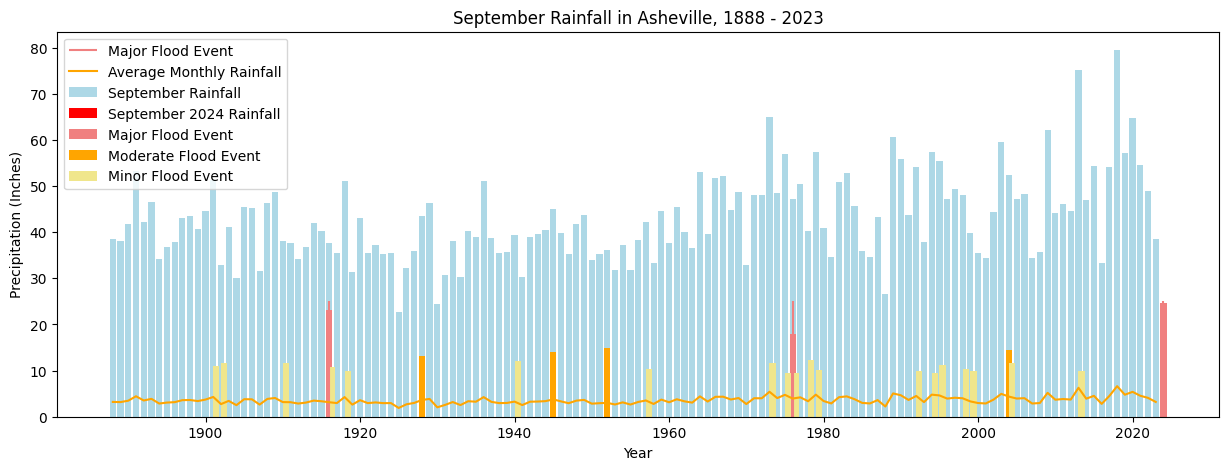

In [202]:
plt.figure(figsize=[15,5])
#plt.bar(df['YEAR'], df['ANN']) 
plt.vlines(df2_major['Year'], ymin=0, ymax=25,label='Major Flood Event',color='lightcoral')
plt.bar(df['YEAR'], df['ANN'], label='September Rainfall', color='lightblue') 
plt.plot(df['YEAR'], df['ANN']/12, color='orange', label='Average Monthly Rainfall')
plt.bar([2024], df.iloc[-1]['SEP'], label='September 2024 Rainfall', color='red') 
plt.bar(df2_major['Year'], df2_major['Level'],label='Major Flood Event', align='center', color='lightcoral')
plt.bar(df2_moderate['Year'], df2_moderate['Level'], label='Moderate Flood Event', color='orange')
plt.bar(df2_minor['Year'], df2_minor['Level'], label='Minor Flood Event', align='edge', color='khaki')
plt.xlabel("Year") 
plt.ylabel("Precipitation (Inches)")
plt.title("September Rainfall in Asheville, 1888 - 2023")
_ = plt.legend()